### 1-Read dataset

In [35]:
# import libararys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  

In [36]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\SVM_Data.csv')

In [37]:
data.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


### 2-Data Exploration

In [38]:
# Shape of data
data.shape

(400, 3)

In [39]:
# Show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [40]:
# Cheack for duplication
data.duplicated().sum()

0

In [41]:
# cheack missing value
data.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

### 3-Data Visualization

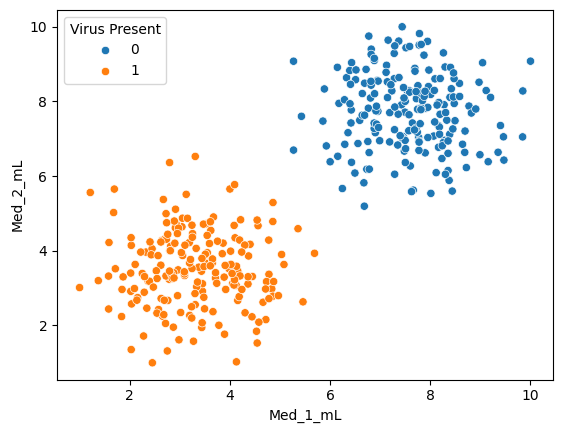

In [42]:
sns.scatterplot(x=data['Med_1_mL'],y=data['Med_2_mL'],hue=data['Virus Present'])
plt.show()

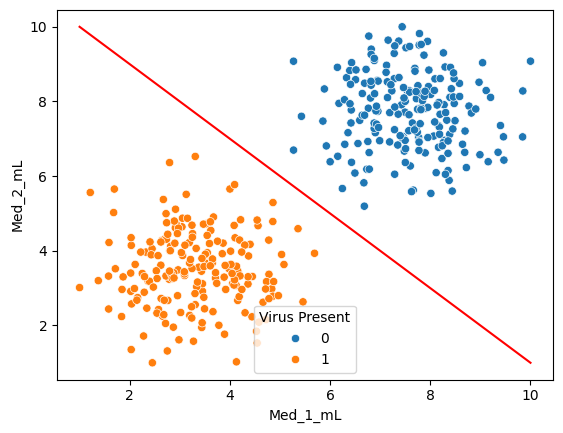

In [43]:
sns.scatterplot(x=data['Med_1_mL'],y=data['Med_2_mL'],hue=data['Virus Present'])

# plot line
x=np.linspace(1,10,100)
m=-1
b=11
# linear equation
y=m * x + b
plt.plot(x,y,color='red')
plt.show()

In [44]:
# split data into feature(x) and label(y)
x=data.drop(['Virus Present'],axis=1)
y=data['Virus Present']

In [45]:
x.head()

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562


In [46]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Virus Present, dtype: int64

In [47]:
# Split data into train_data and test_data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [48]:
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)

x_train shape : (320, 2)
y_train shape : (320,)


In [49]:
print('x_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)

x_test shape : (80, 2)
y_test shape : (80,)


### 4-Build model

In [50]:
from sklearn.svm import SVC

In [51]:
# call model svm with linear kernel
svc=SVC(kernel='linear',C=1000)

In [52]:
# Train / fit linear regression model on train data (X_train,y_train)
svc.fit(x_train,y_train)

SVC(C=1000, kernel='linear')

In [53]:
# Test / predict model on test data (X_test)
y_pred=svc.predict(x_test)

In [54]:
# Print the first 10 predictions and actual values for comparison
print("\nFirst 10 predicted values:", y_pred[:10])
print('###')
print("First 10 actual values:", y_test.values[:10])


First 10 predicted values: [0 1 0 0 1 0 0 1 1 0]
###
First 10 actual values: [0 1 0 0 1 0 0 1 1 0]


In [55]:
from svm_margin_plot import plot_svm_boundary

F:\anconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


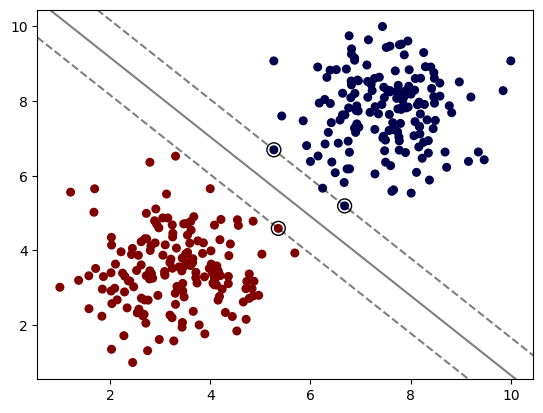

In [56]:
plot_svm_boundary(svc,x_train,y_train)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [57]:
# use poly kernel
poly_model=SVC(kernel='poly',degree=2)
poly_model.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [67]:
# Test / predict model on test data (X_test)
y_pred_poly=poly_model.predict(x_test)

F:\anconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


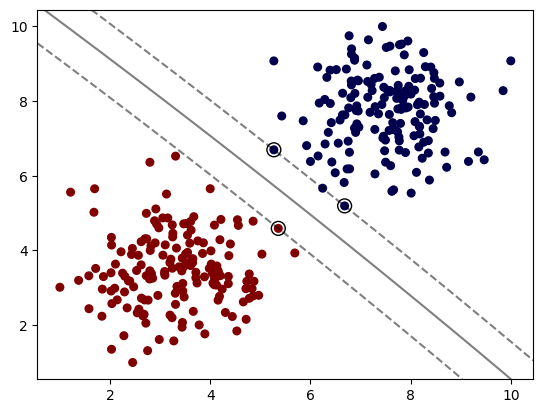

In [58]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(poly_model,x_train,y_train)

In [68]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [61]:
## use rbf kernel
rbf_model=SVC(kernel='rbf',C=1,gamma=1)
rbf_model.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [69]:
# Test / predict model on test data (X_test)
y_pred_rbf=rbf_model.predict(x_test)

F:\anconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


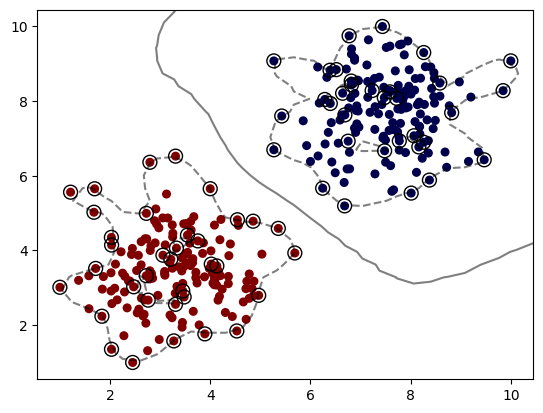

In [62]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(rbf_model,x_train,y_train)

In [70]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [63]:
## use sigmoid kernel
sigmoid_model=SVC(kernel='sigmoid')
sigmoid_model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [71]:
# Test / predict model on test data (X_test)
y_pred_sigmoid=sigmoid_model.predict(x_test)

F:\anconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


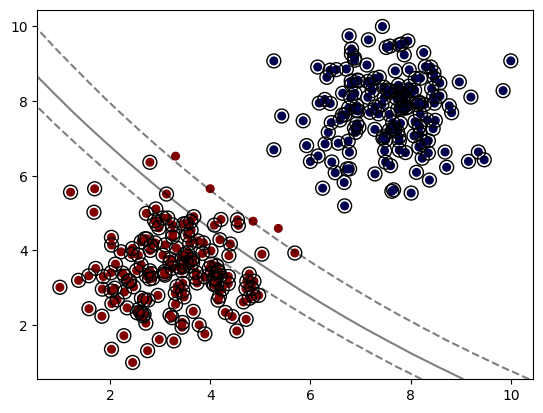

In [64]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(sigmoid_model,x_train,y_train)

In [72]:
print(classification_report(y_test,y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.09      0.11      0.10        38

    accuracy                           0.05        80
   macro avg       0.04      0.05      0.05        80
weighted avg       0.04      0.05      0.05        80



### Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

In [77]:
model = SVC() # SVM without any parameters

In [76]:
# define parameters to use in search for best parameters
parameters = {'kernel': ['linear', 'poly','rbf'],
              'C': [.01,0.1,1],     
              'gamma': [.01,0.1,1]
              }

In [78]:
grid=GridSearchCV(model,parameters)

In [79]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [81]:
# show best parameters
grid.best_estimator_ # or use best_params_

SVC(C=0.01, gamma=0.01, kernel='linear')

In [82]:
# show score
grid.best_score_

1.0

In [83]:
# build model by use best parameters
model_svc=SVC(C=0.01, gamma=0.01, kernel='linear')

In [84]:
model_svc.fit(x_train,y_train)

SVC(C=0.01, gamma=0.01, kernel='linear')

In [85]:
y_pred_model=model_svc.predict(x_test)

In [86]:
# measure preformance
print(classification_report(y_test,y_pred_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

